**The code structure**
1. Read and clean the data
2. Normalize the data/scale the data
3. Define/build the network
4. Compile the network
5. Fit the network
6. Evaluate the netowrk
7. Make predictions

Read and clean the data

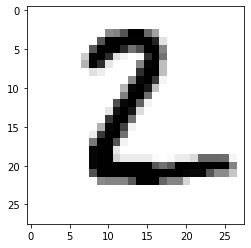

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import warnings
warnings.filterwarnings('ignore')
ds = pd.read_csv('drive/MyDrive/Colab/dataset/MNIST_dataset.csv')
y = ds.pop('labels') # Getting the labels from dataset
x = ds.values.reshape(-1, 28, 28) # reshape the data to 28*28 = 784
plt.imshow(x[1], cmap=plt.cm.binary)
plt.show()

Normalize the data/scale the data

In [ ]:
#X and Y train from index 0 to 160 around 80%
X_train =x[0:160]
Y_train =y[0:160]

#X and Y test from index 161 to 199 wich around 10%
X_test = x[161:181]
Y_test= y[161:181]

#X and Y Valid from index 182 to 199 wich around 10%
X_val = x[161:199]
Y_val= y[161:199]
#Normalize the data - to beetwen 0 and 1
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)

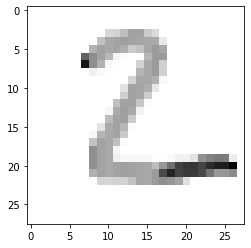

In [ ]:
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()

Define/build the network

In [ ]:
#Using the Sequential model
model = tf.keras.models.Sequential()
#Input layer and flatt the layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#Hidden layer - And added activation relu
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#Dropout layer to help prevent overfitting
model.add(tf.keras.layers.Dropout(0.2))
#Output layer - number of classification 0-9 wich is 10
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


Compile the network

In [ ]:
#Define the paramter to the traning model 
#Adam optimizer to update network weights iterative based in training data
#Loss sparse_categorical_crossentropy to produces a category index of the most likely matching category
#The goal is the network always to minimize the loss and not optimize the accuracy
#The metrics I want to track is the accuracy
#opt = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Fit the network

In [ ]:
#Now train the model
model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

Epoch 1/20
5/5 [==============================] - 0s 35ms/step - loss: 2.2595 - accuracy: 0.1750 - val_loss: 2.2243 - val_accuracy: 0.1579
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 2.0219 - accuracy: 0.5000 - val_loss: 2.1028 - val_accuracy: 0.4474
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 1.7860 - accuracy: 0.6875 - val_loss: 1.9665 - val_accuracy: 0.5789
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 1.5603 - accuracy: 0.8375 - val_loss: 1.8164 - val_accuracy: 0.6579
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 1.3561 - accuracy: 0.8062 - val_loss: 1.6595 - val_accuracy: 0.6842
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 1.1529 - accuracy: 0.8687 - val_loss: 1.5058 - val_accuracy: 0.6842
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.9971 - accuracy: 0.8750 - val_loss: 1.3643 - val_accuracy: 0.7105
Epoch 8/20
5/5 [===============

Evaluate the netowrk

In [ ]:
#Now Evaluate the model with test data so compare the data to the Train data
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("val_loss", val_loss)
print("val_accuracy", val_accuracy)

1/1 [==============================] - 0s 16ms/step - loss: 0.6969 - accuracy: 0.8500
val_loss 0.6968828439712524
val_accuracy 0.8500000238418579


Make predictions

In [ ]:
#Now using  model predict and argmax from numpy to get the predicted numbers
predictions = model.predict([X_test])

Index_0 = np.argmax(predictions[8])
print(Index_0)

4


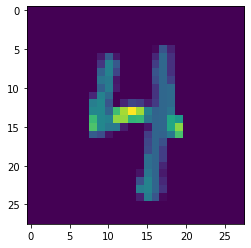

In [ ]:
plt.imshow(X_test[8])
plt.show()


# So I have tested different param. 
1. divided data to train and test 80% - 20% with ADAM 


Train 
loss: 0.4706 - accuracy: 0.9688

Test
loss: 0.9638 - accuracy: 0.7368


2. divided data to train and test 60% - 40%

Train 
loss 0.6233 - accuracy: 0.9500

Test
loss: 1.1352 - accuracy: 0.7692


3. divided data to train and test 80% - 20% with SGD 


Train 
loss: 1.1844 - accuracy: 0.8687

Test
loss: 1.5346 - accuracy: 0.6579


4. divided data to train and test 60% - 40%

Train 
1.2700 - accuracy: 0.8917

Test
loss: 1.6855 - accuracy: 0.6282

So in the end i Added Dropout layer to help with prevent overfitting and the result got worrest with adam optimizers. I even tried different learning rate with SGD and result get worrest.

so now I have the result with adam at 80-20% with dropout layer


Train data

loss: 0.5786 - accuracy: 0.9375


test data

loss: 1.0661 - accuracy: 0.7105


#conclusion. 
Im somehow overfitting my model and cant find why, the best result I got is with optimizers adam and data divived at 80% train and 20% test with adam optimizers

#Update!
I found out that i forgot super importend part Train/val/test so I forgot the part of val data now.
I divided the data to 80 % train, 10% train and 10% val.

Result look much better now both train and Evaluate close to each other wich predic that model not overfiting


#train result 
accuracy: 0.1750 - val_loss: 2.2243 - val_accuracy: 0.1579

#test result
loss: 0.6969 - accuracy: 0.8500






